# Ajuste de curvas de las acciones de Apple

Nuestro proyecto consiste en mostrar en una grafica la manera en como se han comportado las acciones de Apple, en 1 año, teniendo los datos de los precios semanales.  
Ya que las curvas ajustadas se pueden llegar a usar como ayuda en la visualización de datos.
Y gracias a esto podremos realizar un análisis tecnico que nos permita tomar una desición para futuras inversiones.

# Objetivos

## Objetivo general

- Realizar el ajuste de curvas y determinar un análisis tecnico de la acción de Apple, para futuras inversiones

## Objetivos especificos

- Realizar el ajuste de curvas de las acciones de Apple en los diferentes periodos de tiempo antes mencionados, para poder determinar si las acciones van en una tendencia hacia la alta o hacia la baja
- Poder determinar como es su volatilidad y de esta manera saber si sus movimientos son bruscos en las cotizaciones de la acción.
- Conocer su soporte y resistencia

In [1]:
import pandas as pd
import scipy.optimize as opt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Se importa la librería pandas para poder leer los datos de las acciones que se tienen en otro archivo, librería scipy.optimize para utilizar su modulo de optimización, numpy para el procesamiento de matrices y vectores y por último matplotlib.pyplot para hacer las gráficas.

In [2]:
file_name = 'accionesapple.csv'
data = pd.read_csv(file_name)
data

Consecutivo        Date   Adj Close
0             1  18/06/2018  182.147354
1             2  25/06/2018  182.334488
2             3  02/07/2018  185.151627
3             4  09/07/2018  188.461243
4             5  16/07/2018  188.569595
5             6  23/07/2018  188.116501
6             7  30/07/2018  204.871445
7             8  06/08/2018  204.418350
8             9  13/08/2018  215.069290
9            10  20/08/2018  213.665680
10           11  27/08/2018  225.003342
11           12  03/09/2018  218.746384
12           13  10/09/2018  221.257050
13           14  17/09/2018  215.148376
14           15  24/09/2018  223.135147
15           16  01/10/2018  221.701859
16           17  08/10/2018  219.547028
17           18  15/10/2018  216.779327
18           19  22/10/2018  213.804077
19           20  29/10/2018  205.085831
20           21  05/11/2018  202.110565
21           22  12/11/2018  191.964279
22           23  19/11/2018  170.896118
23           24  26/11/2018  177.135223
24           25  03/12/2018  167.126862
25           26  10/12/2018  164.141220
26           27  17/12/2018  149.510544
27           28  24/12/2018  154.966034
28           29  31/12/2018  147.060516
29           30  07/01/2019  151.057922
30           31  14/01/2019  155.551285
31           32  21/01/2019  156.483673
32           33  28/01/2019  165.172806
33           34  04/02/2019  169.031326
34           35  11/02/2019  169.766235
35           36  18/02/2019  172.306458
36           37  25/02/2019  174.298782
37           38  04/03/2019  172.246689
38           39  11/03/2019  185.406006
39           40  18/03/2019  190.317093
40           41  25/03/2019  189.221313
41           42  01/04/2019  196.244263
42           43  08/04/2019  198.107086
43           44  15/04/2019  203.077957
44           45  22/04/2019  203.516266
45           46  29/04/2019  210.937683
46           47  06/05/2019  196.423569
47           48  13/05/2019  189.000000
48           49  20/05/2019  178.970001
49           50  27/05/2019  175.070007
50           51  03/06/2019  190.149994
51           52  10/06/2019  192.740005
52           53  17/06/2019  193.889999


Abrimos el archivo llamado accionesapple que contiene los datos con los que vamos a trabajar, el plazo en el que se trabajará es el de 1 año y lo dividimos entre 52 semanas.

In [3]:
x = data.iloc[:,0].values
w = data.iloc[:,1].values
y = data.iloc[:,2].values

Cada variable lee una columna diferente y almacena los datos dentro de la misma variable para su posterior uso más simplificado.

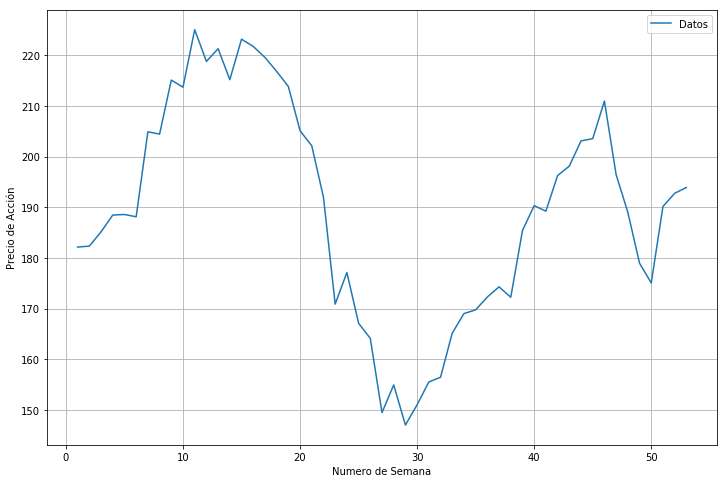

In [4]:
plt.figure(figsize=(12,8))
plt.plot(x, y, '', label = 'Datos')
plt.legend(loc = 'best')
plt.xlabel('Numero de Semana')
plt.ylabel('Precio de Acción')
plt.grid()

Esta es la gráfica de los datos de las acciones de Apple, el vector $y$ representa el precio de la acción en dólares y el vector $x$ representa el lapso de tiempo en semanas. 

In [5]:
def obj1(beta,x,y):
    f=beta[1]*x+beta[0]
    return np.sum((y-f)**2)
beta_inicial =np.array([0,0])
resultado1=opt.minimize(obj1,beta_inicial,args=(x,y))
resultado1
beta=resultado1.x
beta
def obj2(beta,x,y):
    f=beta[2]*x**2+beta[1]*x+beta[0]
    return np.sum((y-f)**2)
beta_inicial = np.array([0,0,0])
resultado2=opt.minimize(obj2,beta_inicial,args=(x,y))
resultado2
beta_cuadratica=resultado2.x
beta_cuadratica
def obj3(beta,x,y):
    f=beta.dot([x**i for i in range(4)])
    return np.sum((y-f)**2)
beta_inicial=np.zeros(4)
resultado3=opt.minimize(obj3,beta_inicial,args=(x,y))
beta3=resultado3.x
beta3

def obj4(beta,x,y):
    f=beta.dot([x**i for i in range(5)])
    return np.sum((y-f)**2)
beta_inicial=np.zeros(5)
resultado4=opt.minimize(obj4,beta_inicial,args=(x,y))
beta4=resultado4.x
beta4
def obj5(beta,x,y):
    f=beta.dot([x**i for i in range(6)])
    return np.sum((y-f)**2)
beta_inicial=np.zeros(6)
resultado5=opt.minimize(obj5,beta_inicial,args=(x,y))
beta5=resultado5.x
beta5

ypoints= y*1e3

y1=beta[1]*x+beta[0]
y2=beta_cuadratica[2]*x**2+beta_cuadratica[1]*x+beta_cuadratica[0]
y3=beta3[3]*x**3+beta3[2]*x**2+beta3[1]*x+beta3[0]
y4=beta4[4]*x**4+beta4[3]*x**3+beta4[2]*x**2+beta4[1]*x+beta4[0]
y5=beta5[5]*x**5+beta5[4]*x**4+beta5[3]*x**3+beta5[2]*x**2+beta5[1]*x+beta5[0]
beta4


array([ 1.33213230e+02,  2.16477716e+01, -1.66369733e+00,  4.37012578e-02,
       -3.71744620e-04])

Se definieron las funciones que serían necesarias para calcular las rectas ajustadas a la gráfica de los datos, se empezó desde una función lineal, luego una cuadrática, después una cúbica y por último un polinomio de grado 4. Una vez definidas las funciones para dichas rectas, se formularon las operaciones para darle un nuevo valor a cada variable $y$ para ser graficados.

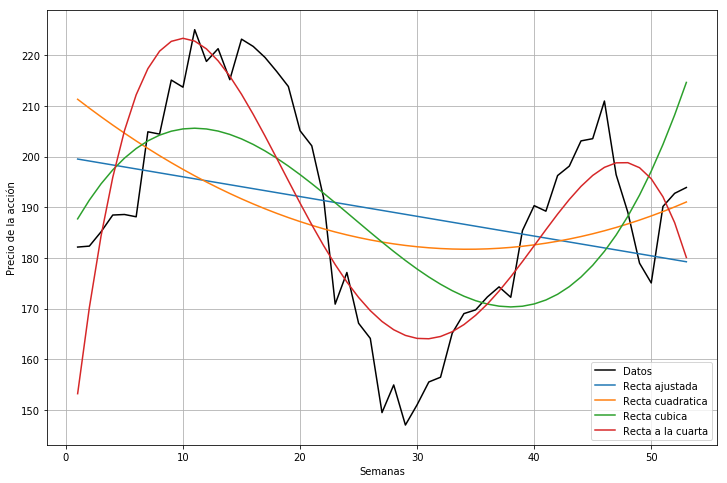

In [6]:
plt.figure(figsize=(12,8))
plt.plot(x,y,"k",label="Datos") # Graficar los puntos dados
plt.plot(x,y1,"",label="Recta ajustada") 
plt.plot(x,y2,"",label="Recta cuadratica")
plt.plot(x,y3,"",label="Recta cubica")
plt.plot(x,y4,"",label="Recta a la cuarta")
plt.xlabel("Semanas")
plt.ylabel("Precio de la acción")
plt.legend(loc="best")
plt.grid()
plt.show()

En la gráfica se puede ver que la recta ajustada que más se asemeja a la de los datos es el polinomio de grado 4.

**Nota:** Se hizo la recta del polinomio de grado 5 pero al ser graficada nos dimos cuenta que las rectas después del polinomio de grado 4 se empiezan a descomponer y esto ocasiona una distorsión dentro de la gráfica por lo que se decidió graficar hasta el polinomio de grado 4.


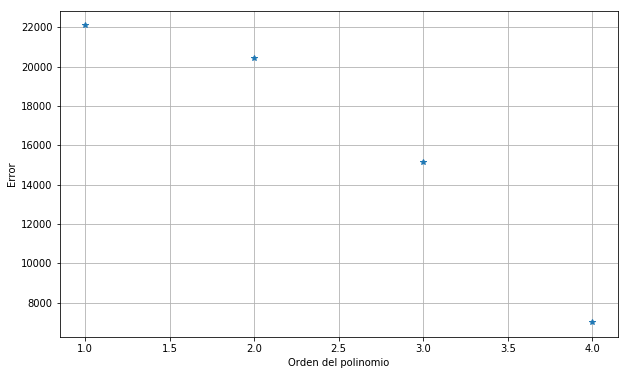

In [7]:
e_ms = []

def obj(beta,x,y,n):
    f = beta.dot([x**i for i in range(n+1)])
    return np.sum((y-f)**2)

for i in range(4):  
    beta_inicial = np.zeros(i+2)
    resultado = opt.minimize(obj, beta_inicial, args=(x,y,i+1))
    e_ms.append(resultado.fun)

plt.figure(figsize=(10,6))
plt.plot(np.arange(4)+1, e_ms, "*")
plt.xlabel("Orden del polinomio")
plt.ylabel("Error")
plt.grid()
plt.show()

Esta gráfica representa el error que que cada función tiene, como se puede apreciar; la función lineal es la que más error al gráficar contiene, después la función cuadrática, luego la cúbica y por último el polinomio de grado 4 es el que menos error marca al ser graficado.

In [10]:
x=53
p1=beta[1]*x+beta[0]
p2=beta_cuadratica[2]*x**2+beta_cuadratica[1]*x+beta_cuadratica[0]
p3=beta3[3]*x**3+beta3[2]*x**2+beta3[1]*x+beta3[0]
p4=beta4[4]*x**4+beta4[3]*x**3+beta4[2]*x**2+beta4[1]*x+beta4[0]
p1,p2,p3,p4,y[52]

(179.250806280824,
 191.03230784473755,
 214.60716028617287,
 180.08762395048433,
 193.889999)

Estamos usando las funciones para predecir los valores que podrán salir posteriormente.

In [11]:
co1=p1-y[52]
co2=p2-y[52]
co3=p3-y[52]
co4=p4-y[52]
co1,co2,co3,co4

(-14.63919271917598,
 -2.8576911552624438,
 20.71716128617288,
 -13.80237504951566)

Estas operaciones no muestran que tan alejadas están nuestra predicciones del punto evaluado.

## Análisis Técnico

Al realizar el ajuste de curvas podemos analizarlas y determinar lo deseado de las gráficas gracias al análisis técnico.

En este caso nos damos cuenta de algo que sucede siempre con las acciones, lo cual es que la historia siempre se repite, al observar las graficas nos damos cuenta de que la acción sigue hacia una tendencia alcista lo cual nos recomienda comprar acciones en este momento, ya que más adelante subirán el precio.

Pudimos observar que las acciones de Apple poseen una gran volatilidad, esto quiere decir que se mueven de manera muy brusca, y pueden variar mucho su precio.

Para finalizar analizamos su soporte y resistencia, un máximo habitual (la resistencia) y un mínimo habitual (el soporte). Al graficarla nos damos cuenta que las acciones de Apple rompieron su resistencia anterior, por lo cual es otro indicador de que las acciones van a seguir subiendo.


### Conclusiones

Al realizar un ajuste de curvas a las acciones de Apple de 1 año de periodo, se puede concluir que posee una volatilidad muy alta, en la gráfica se puede apreciar que tan solo en cuestión de pocas semanas el valor de las acciones pueden subir o bajar mucho de valor. El ajuste más aproximado a los valores reales es por medio de un polinomio de grado 4 y esto nos da una idea del cómo se mueve en realidad el precio de las acciones, si se quiere hacer una aproximación con polinomios mayores a grado 4 se presentarán distorsiones en la gráfica que entre más grandes sean mayor error tendrán y también si se quiere hacer la aproximación con valores menores al polinomio de grado 4, presentarán error en la precisión de los datos.

## Referencias

Yahoo Finance. (N/A). Apple Inc. (AAPL). Junio 20, 2019, de Yahoo Finance Sitio web: https://finance.yahoo.com/